In [ ]:
#%matplotlib inline
import sys
sys.path.append('/home/socolovsky_lab/ccount/ccount/workflow/scripts')
import glob
import numpy as np
import matplotlib.pyplot as plt

In [62]:
from ccount_utils.blob import load_blobs
from ccount_utils.blob import show_rand_crops
from ccount_utils.blob import remove_edge_crops
import ccount_utils.blob
from ccount_utils.blob import flat2image

In [55]:
%pwd

'/mnt/d/ccount/dev2021/training_data/E2f4_CFUe_2OCT20/res/filter_merge'

In [57]:
name = "1unitEpo_1"

# Load Pre-build crops (cropped images of blobs)

In [58]:
ls /home/socolovsky_lab/ccount/dev2021/training_data/Ashley_8_7_20/res/blob_crops/point125unitsEpo_2*.npy.gz

/home/socolovsky_lab/ccount/dev2021/training_data/Ashley_8_7_20/res/blob_crops/point125unitsEpo_2-Stitching-18.0.crops.npy.gz*
/home/socolovsky_lab/ccount/dev2021/training_data/Ashley_8_7_20/res/blob_crops/point125unitsEpo_2-Stitching-18.1.crops.npy.gz*
/home/socolovsky_lab/ccount/dev2021/training_data/Ashley_8_7_20/res/blob_crops/point125unitsEpo_2-Stitching-18.2.crops.npy.gz*
/home/socolovsky_lab/ccount/dev2021/training_data/Ashley_8_7_20/res/blob_crops/point125unitsEpo_2-Stitching-18.3.crops.npy.gz*


In [6]:
i = 0
for fname in glob.iglob('/home/socolovsky_lab/ccount/dev2021/training_data/E2f4_CFUe_SCF_2OCT20/res/blob_crops/E2f4_CFUe_SCF_WT2_1*0.crops.npy.gz'):
    i+=1
    print(i, fname)
    if (i== 1):
        crops = load_blobs(fname)
    else:
        crop_ = load_blobs(fname)
        crops = np.vstack((crops, crop_))
    print('merged crops:', crops.shape)

1 /home/socolovsky_lab/ccount/dev2021/training_data/E2f4_CFUe_SCF_2OCT20/res/blob_crops/E2f4_CFUe_SCF_WT2_1-Stitching-10.0.crops.npy.gz
Reading /home/socolovsky_lab/ccount/dev2021/training_data/E2f4_CFUe_SCF_2OCT20/res/blob_crops/E2f4_CFUe_SCF_WT2_1-Stitching-10.0.crops.npy.gz
n-crop: 5355, crop width: 80
0 Yes, 0 No, 0 Uncertain, 5355 Unlabeled
Total: 5355
merged crops: (5355, 25606)


## Filter blobs based on size

### Histogram

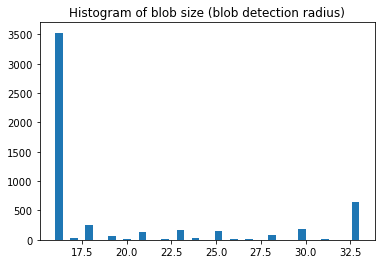

In [47]:
r_ = crops[:,2]
plt.hist(r_, 40)
plt.title("Histogram of blob size (blob detection radius)")
plt.show()

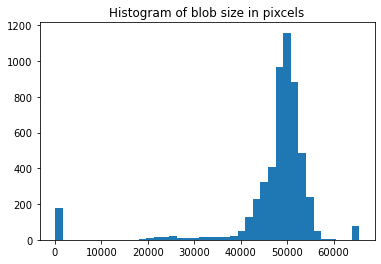

5355

In [48]:
r_ = crops[:,6]
plt.hist(r_, 40)
plt.title("Histogram of blob size in pixcels")
plt.show()
len(crops)

960 40


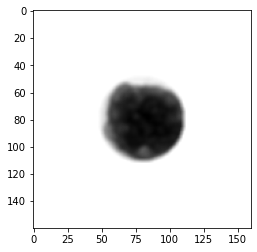

In [79]:


crops_clean, crops_bad = ccount_utils.blob.remove_edge_crops(crops[0:1000, :])
print(len(crops_clean), len(crops_bad))

(160, 160)
741 259


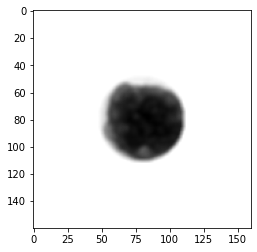

In [117]:
from importlib import reload  

reload(ccount_utils.blob)
crops_clean, crops_bad = ccount_utils.blob.remove_edge_crops(crops[0:1000, :])
print(len(crops_clean), len(crops_bad))

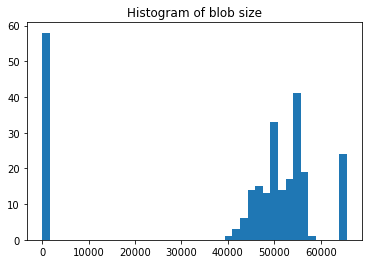

In [118]:
r_ = crops_bad[:,6]
plt.hist(r_, 40)
plt.title("Histogram of blob size")
plt.show()

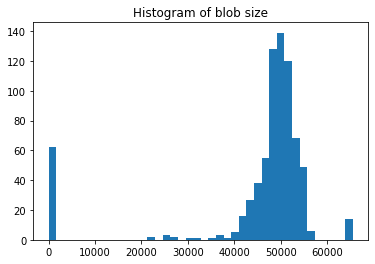

In [119]:
r_ = crops_clean[:,6]
plt.hist(r_, 40)
plt.title("Histogram of blob size")
plt.show()

Samples of 4 blobs will be plotted


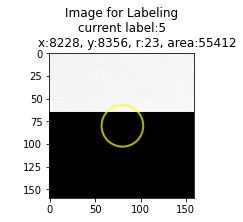

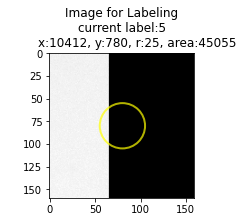

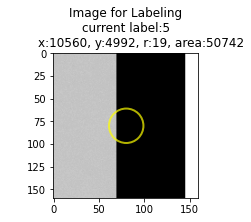

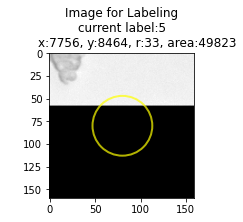

True

In [131]:
show_rand_crops(crops_bad, num_shown=4)

Samples of 4 blobs will be plotted


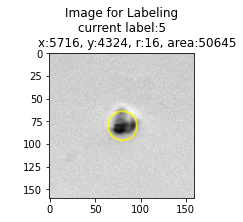

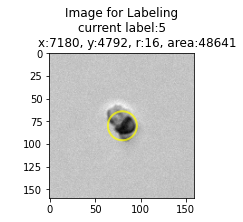

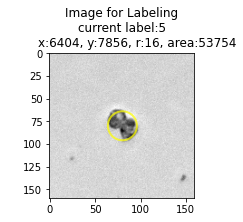

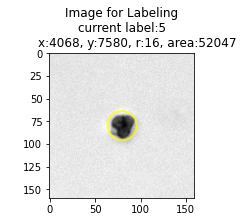

True

In [130]:
show_rand_crops(crops_clean, num_shown=4)

In [133]:
def filter_blobs(crops, small, large):
    idx1 = crops[:, 6] > small
    idx2 = crops[:, 6] < large
    idx = [all(tup) for tup in zip (idx1, idx2)]
    return (crops[idx, ])

In [134]:
# Filtering Params
num_shown = 5
min_mid = 20000  # mid is target, filter out < 20k is safe
min_large = 1e6

small_crops = filter_blobs(crops, 0, min_mid)
mid_crops = filter_blobs(crops, min_mid, min_large)
large_crops = filter_blobs(crops, min_large, 1e7)

print(small_crops.shape, mid_crops.shape, large_crops.shape)

(9, 25606) (5169, 25606) (0, 25606)


there are 9 small blobs
Samples of 5 blobs will be plotted


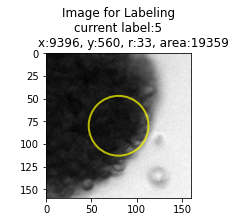

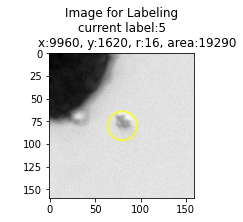

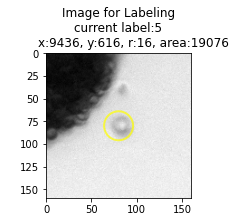

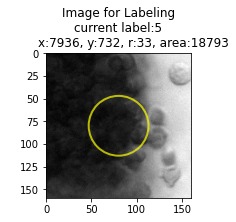

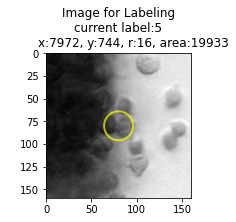

True

In [137]:
## small_blobs
print('there are {} small blobs'.format(len(small_crops)))
show_rand_crops(crops=small_crops, num_shown=num_shown)

there are 5169 mid blobs
Samples of 5 blobs will be plotted


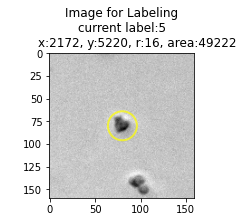

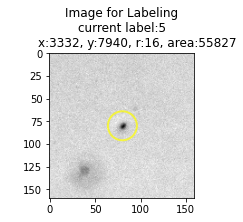

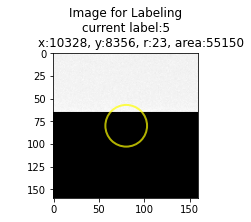

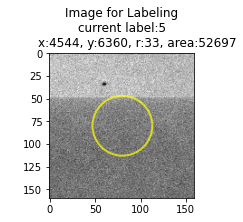

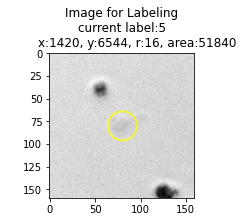

True

In [138]:
## mid_blobs
print('there are {} mid blobs'.format(len(mid_crops)))
show_rand_crops(crops=mid_crops, num_shown=num_shown)

In [139]:

## large_blobs
print('there are {} large blobs'.format(len(large_crops)))
show_rand_crops(crops=large_crops, num_shown=num_shown)

there are 0 large blobs
num_blobs after filtering is 0


False

In [19]:



#np.save('small.npy', small_crops)
np.save('test.mid.npy', mid_crops)
#np.save('CFUe_7MAY18.large.npy', large_crops)

In [145]:
# Filter by yes/no
yes_blobs = show_rand_crops(crops_clean, label_filter=1, num_shown=4)

num_blobs after filtering is 0


In [147]:
no_blobs = show_rand_crops(crops_clean, label_filter=0, num_shown=4)

num_blobs after filtering is 0


In [148]:
print("yes blobs", yes_blobs.shape)
print("no blobs", no_blobs.shape)

AttributeError: 'bool' object has no attribute 'shape'

In [ ]:
size = 200
idx_yes = np.random.choice(range(len(yes_blobs)), 200, replace=False)
yes_blobs_sample = yes_blobs[idx_yes, :]

idx_no = np.random.choice(range(len(no_blobs)), 1800, replace=False)
no_blobs_sample = no_blobs[idx_no, :]

In [ ]:
print(yes_blobs_sample.shape)
print(no_blobs_sample.shape)
np.save(name + ".Daniel1.yes.npy", yes_blobs_sample)
np.save(name + ".Daniel1.no.npy", no_blobs_sample)

In [ ]:
!gzip -f *npy

In [ ]:
!jupyter nbconvert --to html filter_merge.ipynb

In [ ]:
html_name = name + ".filter_merge.html"
nb_name = name + '.filter_merge.ipynb'
!echo $html_name $nb_name
!cp filter_merge.html $html_name
!cp filter_merge.ipynb $nb_name